In [442]:
import pandas as pd
import ipywidgets as widgets
from bokeh.plotting import figure,show
from bokeh.palettes import BuGn3,Bright3,Spectral11
from bokeh.io import output_notebook
from IPython.display import clear_output
from bokeh.transform import dodge
import matplotlib.pyplot as plt

In [443]:
df_data_without_watchers_outliers = pd.read_csv('data/data_cleaned/data_without_watchers_outliers_2023_05.csv')
df_watchers_outlires = pd.read_csv('data/data_cleaned/watchers_outliers_2023_05.csv')

contributors = pd.read_csv('data/data_cleaned/repo_contributors_05.csv')

data_c = pd.concat([df_data_without_watchers_outliers,df_watchers_outlires])

data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25701 entries, 0 to 3268
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      25701 non-null  int64 
 1   Unnamed: 0        25701 non-null  int64 
 2   full_name         25701 non-null  object
 3   url               25701 non-null  object
 4   clone_url         25701 non-null  object
 5   watchers_count    25701 non-null  int64 
 6   stargazers_count  25701 non-null  int64 
 7   language          25701 non-null  object
 8   forks             25701 non-null  int64 
 9   description       25478 non-null  object
 10  type              25701 non-null  object
 11  license           25701 non-null  object
 12  fork              25701 non-null  bool  
 13  created_at        25701 non-null  object
 14  updated_at        25701 non-null  object
 15  pushed_at         25701 non-null  object
dtypes: bool(1), int64(5), object(10)
memory usage: 3.2+ MB


<h3>La technologie la plus utilisée au fil du temps</h3>

In [ ]:
output_notebook()

dates = list(data_c['created_at'].unique())

gdate = dates[0]
gcount = 20

wl = widgets.Label('La technologie la plus utilisée au fil du temps')

wd = widgets.Dropdown(
    options=dates,
    value=dates[0],
    description='Temps :'
)

ws = widgets.IntSlider(
    min=10,
    max=500,
    value=gcount,
    continuous_update=True,
    description='Lines :'
    
)

wb = widgets.Button(
    description='VALIDE',
    button_style='success'
)

def mostPupTech(date,count):
    clear_output(wait=True)
    display(wl,ws,wd,wb)
    global gdate,gcount
    gdate = date
    gcount = count
    df = data_c.loc[data_c['created_at'] == f'{gdate}'].groupby('language')['language'].count().head(count).sort_values(ascending=True).reset_index(name='counts')

    #create bars
    p = figure(y_range=df['language'],x_range=(0,max(df['counts'])),title=f'La technologie la plus utilisée au fil du temps : {date}',tools='hover',tooltips='Counts dépots : @counts')
    p.hbar(y='language',right='counts',height=0.90,source=df)
    show(p)
    

def changedCount(count):
    global gcount
    gcount = count

def changedDate(date):
    global gdate
    gdate = date

wb.on_click(lambda x:mostPupTech(gdate,gcount))

ws.observe(lambda x:changedCount(x["new"]),names='value')
wd.observe(lambda x:changedDate(x['new']),names='value')

display(wl,ws,wd,wb)


Label(value='La technologie la plus utilisée au fil du temps')

IntSlider(value=20, description='Lines :', max=500, min=10)

Dropdown(description='Temps :', options=('2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05',…

Button(button_style='success', description='VALIDE', style=ButtonStyle())

In [374]:
languages = list(df_data_without_watchers_outliers['language'].unique())

#Function to get repositories by languages
def getRepositoriesByLanguage(lang):
    return df_data_without_watchers_outliers.loc[df_data_without_watchers_outliers['language'] == lang]

#Function to get repositories from table contributors
def getRepositoriesFromContributionsByName(df_repos):
    repos = []
    repos_names = df_repos['full_name']
    contributors_names = contributors['full_name'].unique()
    for r_name in repos_names:
        if r_name in contributors_names:
            rcs = contributors.loc[contributors['full_name'] == r_name]
            for index , rc in rcs.iterrows():
                repos.append(dict(full_name=rc.full_name,name=rc['name'],commits=rc.commits))

    return pd.DataFrame(repos)



<h4>Contributeurs actifs : Par langue</4>

In [445]:
output_notebook()
w = widgets.Dropdown(
    options=languages,
    value=languages[0],
    description='Languages:',
    #disabled=False,
)

def hbar(df):
    clear_output(wait=True)
    display(w)     
    df = df.groupby(['name'],group_keys=True)[['full_name','commits']].apply(lambda x:x.sum()).reset_index(names='name').head(50).sort_values(by='commits',ascending=True)
    p = figure(y_range=df['name'],x_range=(0,max(df['commits'])),title=f'Contributeurs les plus actifs',toolbar_location=None,tools='hover',tooltips='@full_name : @commits commits',height=700)
    p.x_range.start = 0
    p.hbar(y='name',right='commits',height=0.90,source=df)
    #legend
    #p.legend.orientation = 'horizontal'
    #p.legend.location = 'top_center'
    show(p)

w.observe(lambda x:hbar(getRepositoriesFromContributionsByName(getRepositoriesByLanguage(x['new']))),names='value')
display(w)

Dropdown(description='Languages:', index=2, options=('C++', 'Kotlin', 'Jupyter Notebook', 'Java', 'TypeScript'…

<h4>Compter des dépôts par type de propriétaire : </4>

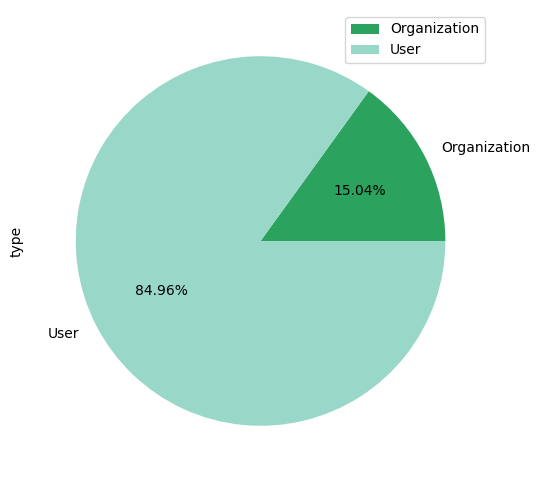

In [446]:
d = data_c.groupby(by=['type'])['type'].count()

dd = pd.DataFrame(d,index=['Organization','User'])

dd.plot.pie(y='type',autopct="%.2f%%", colors=BuGn3,figsize=(6, 6))

plt.show()

<h4>Compter des dépôts par licence :</4>

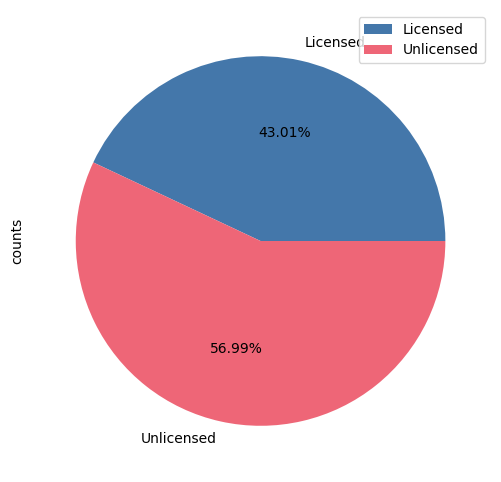

In [447]:
licensed = len(data_c.loc[data_c['license'] != 'No License'])
unlicensed = len(data_c.loc[data_c['license'] == 'No License'])

dc = dict(licensed=licensed,unlicensed=unlicensed)

data = pd.DataFrame.from_dict(dc.items()).rename(index={0:'Licensed',1:'Unlicensed'},columns={0:'license',1:'counts'})

data.plot.pie(y='counts',autopct="%.2f%%", colors=Bright3,figsize=(6, 6))

plt.show()

<h4>les dépôts les plus populaires</h4>

In [452]:
output_notebook()
def getPopularRepos(size):
    data_grouped = data_c.sort_values(by='watchers_count',ascending=False).head(size).groupby(['full_name','forks'])['watchers_count'].sum().sort_values(ascending=False).reset_index()

    tooltips = [("watchers", "@watchers_count"),("forks", "@forks")]
    
    p = figure(x_range=data_grouped['full_name'],y_range=(0,max(data_grouped['watchers_count'])),width=1000,title=f'les dépôts les plus populaires',toolbar_location=None,tools='hover',tooltips=tooltips)
    p.y_range.start = 0

    p.vbar(x=dodge('full_name', 0.3, range=p.x_range), top='watchers_count', width=0.5, source=data_grouped,color="#c9d9d3",legend_label="Watchers Count")
    p.vbar(x=dodge('full_name', 0.7, range=p.x_range), top='forks', width=0.5, source=data_grouped,color="#ddb7b1",legend_label="Forks")
    
    p.xaxis.major_label_orientation =3/4 #"horizontal"
    p.xgrid.grid_line_color = None
    
    #legend
    p.legend.orientation = 'horizontal'
    p.legend.location = 'top_center'
    show(p)


getPopularRepos(20)


Loading BokehJS ...

<h4>Nombre de dépôts par contributeur</h4>

In [451]:
#get repos if they have a similar contributor
def nbrReposiroriesByContributors(size):
    return contributors.groupby('name')['full_name'].count().sort_values(ascending=False).head(size).sort_values(ascending=True).reset_index(name='counts')

data = nbrReposiroriesByContributors(40)

p = figure(y_range=data['name'],x_range=(0,max(data['counts'])),title=f'Nombre de dépôts par contributeur',toolbar_location=None,tools='hover',tooltips='@name : @counts Dépots',height=700)
p.x_range.start = 0
p.hbar(y='name',right='counts',height=0.90,source=data,legend_label="Nombre de dépôts")
show(p)